# Toolkit

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler,StandardScaler,PolynomialFeatures
from datasist.structdata import detect_outliers
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import joblib

# Inspect

In [2]:
df = pd.read_csv(r'Data/cleaned_used_cars_price.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75,Maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,Honda
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,Maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi


In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   int64  
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   int64  
 11  Price              5872 non-null   float64
 12  Brand              5872 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 596.5+ KB


In [5]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [6]:
num_cols = [ 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats','Price']

In [7]:
df[num_cols].head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,72000,26.60,998,58.16,5,1.75
1,41000,19.67,1582,126.20,5,12.50
2,46000,18.20,1199,88.70,5,4.50
3,87000,20.77,1248,88.76,7,6.00
4,40670,15.20,1968,140.80,5,17.74


# Visuals for relations between features and target

C:\Users\shehab\AppData\Local\Temp\ipykernel_13432\1337005872.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

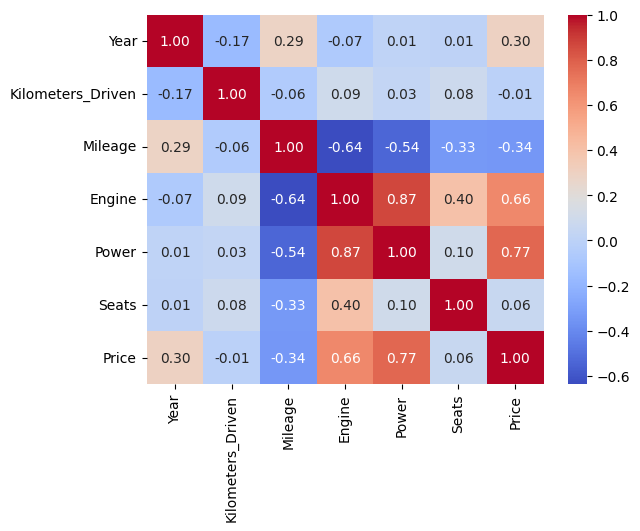

In [8]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

`Price has a strong relation with 2 features only`

In [9]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand'],
      dtype='object')

<Axes: xlabel='Price', ylabel='Location'>

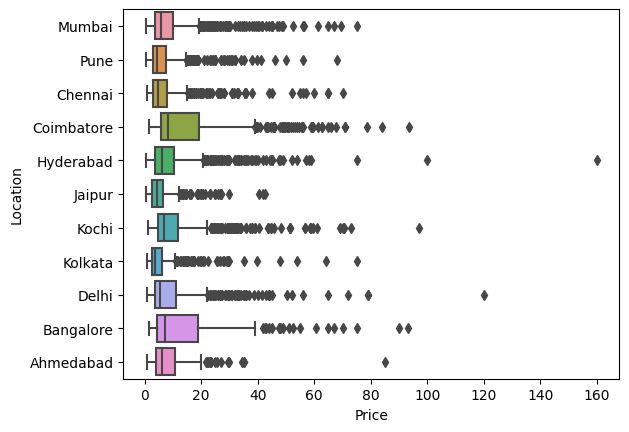

In [10]:
sns.boxplot(data=df, y='Location', x='Price')

`Ranges change with location, so keep location feature`

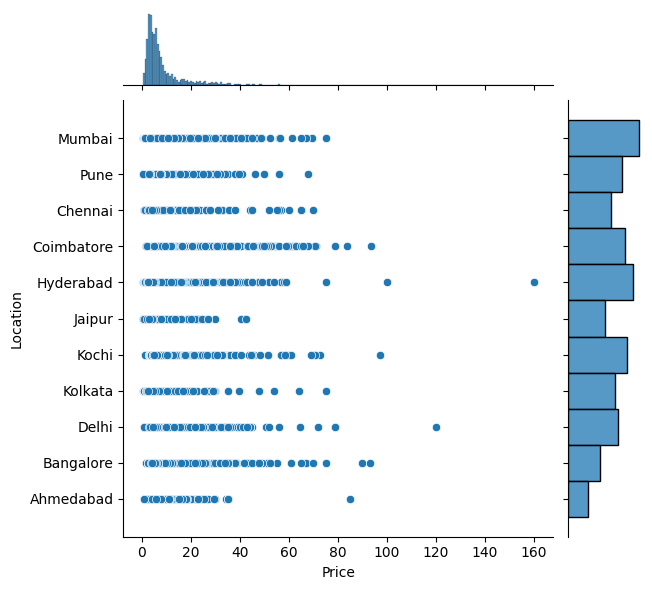

In [11]:
sns.jointplot(data=df, x="Price", y="Location")

<Axes: xlabel='Price', ylabel='Year'>

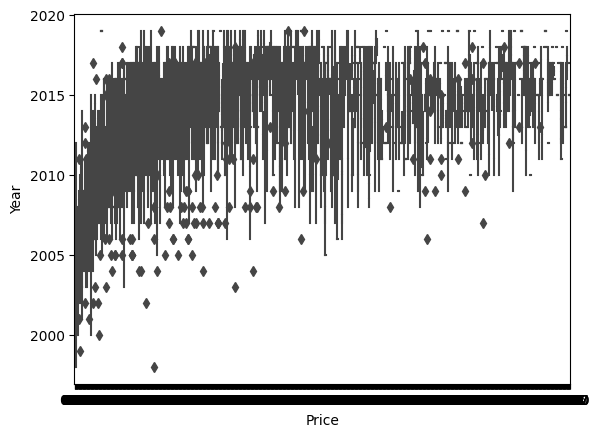

In [12]:
sns.boxplot(data=df, y='Year', x='Price')

<Axes: xlabel='Year', ylabel='Price'>

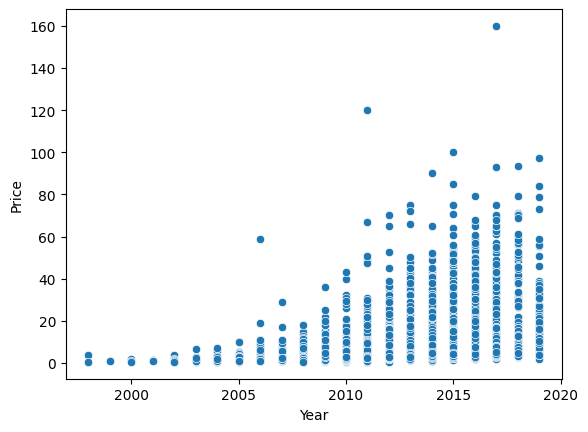

In [13]:
sns.scatterplot(data=df, x='Year', y='Price')

<Axes: xlabel='Price', ylabel='Owner_Type'>

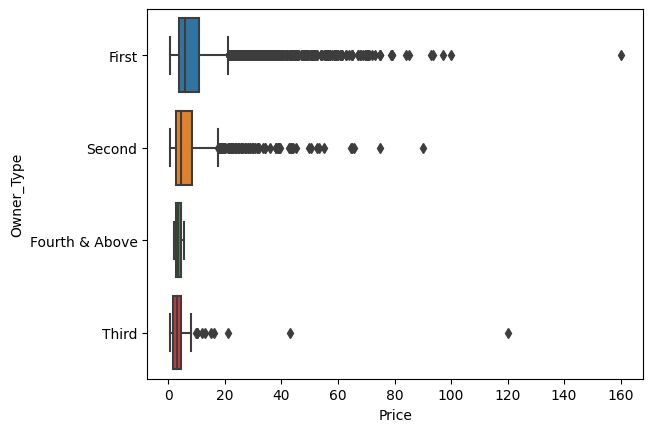

In [14]:
sns.boxplot(data=df, y='Owner_Type', x='Price')

<Axes: xlabel='Price', ylabel='Transmission'>

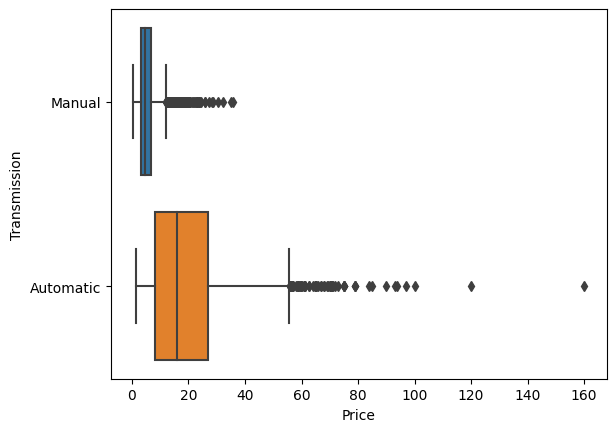

In [15]:
sns.boxplot(data=df, y='Transmission', x='Price')

<Axes: xlabel='Price', ylabel='Brand'>

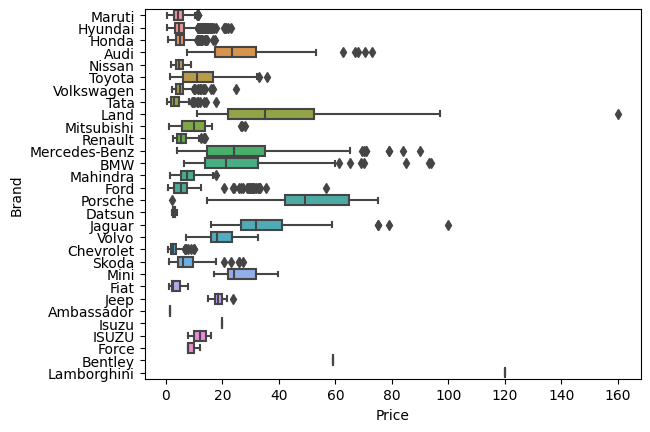

In [16]:
sns.boxplot(data=df, y='Brand', x='Price')

<Axes: xlabel='Price', ylabel='Fuel_Type'>

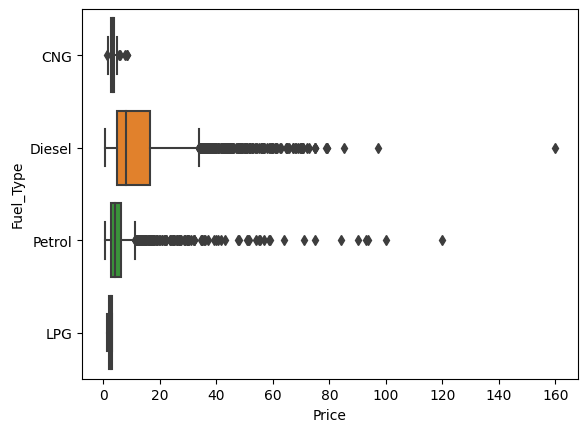

In [17]:
sns.boxplot(data=df, y='Fuel_Type', x='Price')

# Outliers

In [18]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand'],
      dtype='object')

<Axes: >

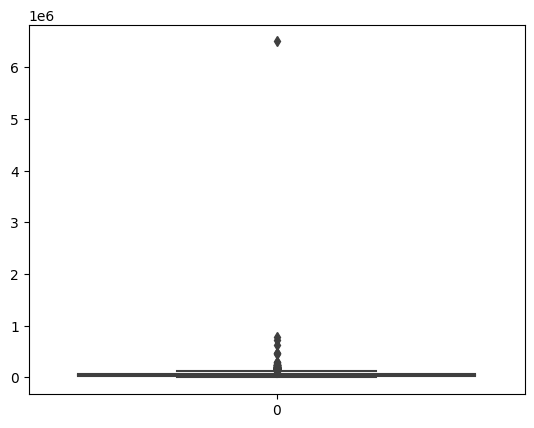

In [19]:
sns.boxplot(data=df["Kilometers_Driven"])

In [20]:
df["Kilometers_Driven"].sort_values(ascending=False)

2269    6500000
327      775000
1813     720000
345      620000
3010     480000
         ...   
1209       1000
2004       1000
5206       1000
5468        600
1323        171
Name: Kilometers_Driven, Length: 5872, dtype: int64

In [21]:
df.drop(2269, axis=0, inplace=True)

<Axes: >

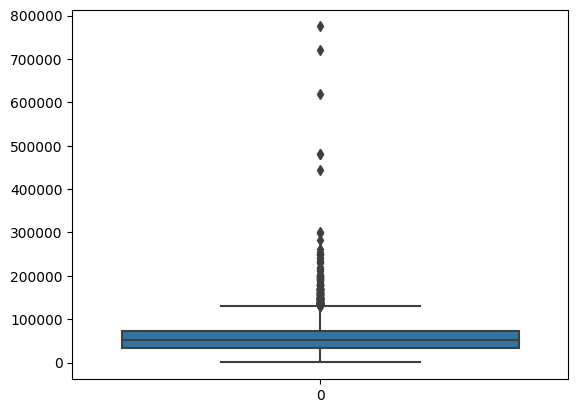

In [22]:
sns.boxplot(data=df["Kilometers_Driven"])

In [23]:
idx = df[df["Kilometers_Driven"] > 300000].index
idx

Int64Index([327, 345, 1813, 2745, 3010, 4378], dtype='int64')

In [24]:
df.drop(idx, axis=0, inplace=True)

<Axes: >

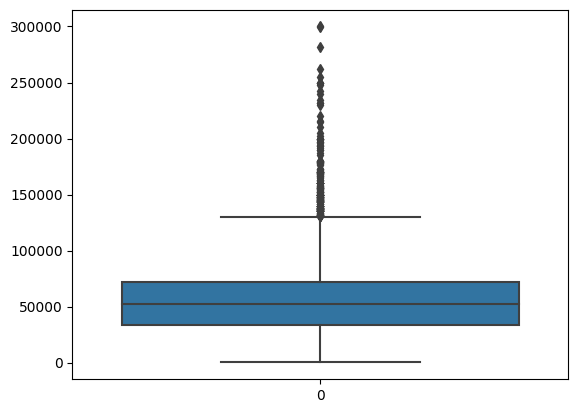

In [25]:
sns.boxplot(data=df["Kilometers_Driven"])

In [26]:
df[df["Kilometers_Driven"] > 200000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.80,2494,102.00,7,4.00,Toyota
76,Toyota Innova 2.0 G1,Chennai,2006,230000,Petrol,Manual,Third,12.40,1998,132.00,8,4.50,Toyota
176,Ford Fiesta 1.4 TDCi EXI Limited Edition,Chennai,2006,216000,Diesel,Manual,Second,17.80,1399,68.00,5,1.45,Ford
557,Audi A6 2011-2015 2.0 TDI Premium Plus,Hyderabad,2012,202082,Diesel,Automatic,First,17.68,1968,174.33,5,12.30,Audi
766,Ford Endeavour XLT TDCi 4X2,Jaipur,2008,205000,Diesel,Manual,Second,13.10,2499,141.00,7,3.90,Ford
811,Mahindra Xylo H4,Chennai,2016,215000,Diesel,Manual,First,14.02,2179,118.30,7,7.50,Mahindra
1070,Toyota Innova 2.5 V Diesel 7-seater,Chennai,2011,248000,Diesel,Manual,Second,12.80,2494,102.00,7,9.20,Toyota
1401,Honda City 1.5 S MT,Delhi,2009,231673,Petrol,Manual,First,17.00,1497,118.00,5,2.60,Honda
1486,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494,102.00,8,4.00,Toyota
1720,Mercedes-Benz New C-Class C 200 Kompressor Ele...,Pune,2007,220000,Petrol,Automatic,Second,11.74,1796,186.00,5,6.00,Mercedes-Benz


<Axes: >

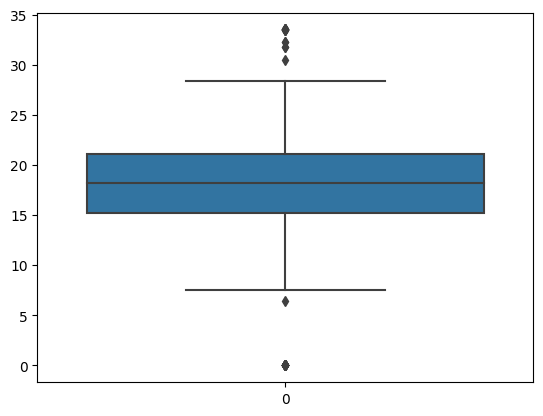

In [27]:
sns.boxplot(data=df["Mileage"])

In [28]:
idx = detect_outliers(df, 0, ["Mileage"])
(len(idx)/df.shape[0])*100

0.7331628303495311

In [29]:
df.drop(idx, axis=0, inplace=True)

<Axes: >

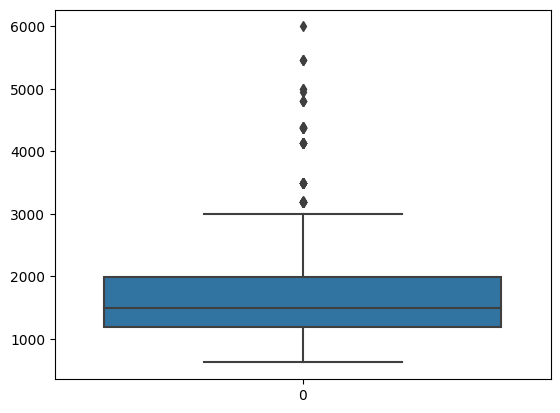

In [30]:
sns.boxplot(data=df["Engine"])

In [31]:
df[df["Engine"] > 3000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73000,Petrol,Automatic,First,8.50,4806,500.00,5,14.50,Porsche
147,Mercedes-Benz S Class 2005 2013 S 500,Kolkata,2010,35277,Petrol,Automatic,First,7.81,5461,362.90,5,30.00,Mercedes-Benz
442,Audi Q7 4.2 TDI Quattro Technology,Coimbatore,2016,51002,Diesel,Automatic,First,11.33,4134,335.20,7,48.91,Audi
567,Audi Q7 4.2 TDI Quattro Technology,Kochi,2014,79926,Diesel,Automatic,First,11.33,4134,335.20,7,29.77,Audi
570,Mercedes-Benz S Class 2005 2013 S 350 L,Bangalore,2006,47088,Petrol,Automatic,Second,10.13,3498,364.90,5,19.00,Mercedes-Benz
671,Mercedes-Benz SLK-Class SLK 350,Coimbatore,2016,22732,Petrol,Automatic,First,18.10,3498,306.00,2,55.54,Mercedes-Benz
681,Ford Endeavour 3.2 Trend AT 4X4,Coimbatore,2017,50484,Diesel,Automatic,First,10.91,3198,197.20,7,31.12,Ford
772,Mercedes-Benz SLK-Class SLK 350,Bangalore,2015,10000,Petrol,Automatic,First,18.10,3498,306.00,2,55.00,Mercedes-Benz
780,Ford Endeavour 3.2 Titanium AT 4X4,Coimbatore,2017,59636,Diesel,Automatic,First,10.91,3198,197.00,7,29.20,Ford
1008,Land Rover Range Rover TDV8 (Diesel),Bangalore,2011,55000,Diesel,Automatic,First,10.20,4367,308.00,7,67.00,Land


<Axes: >

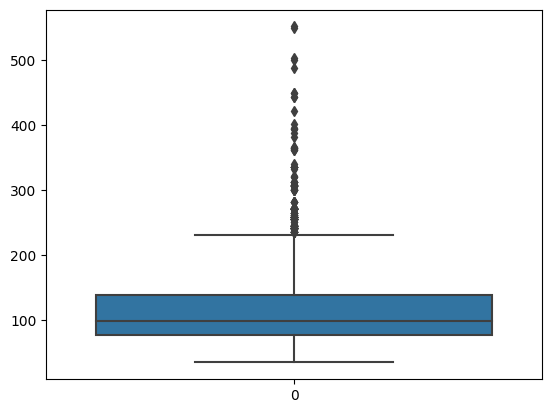

In [32]:
sns.boxplot(data=df["Power"])

In [33]:
df[df["Power"] > 250]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
38,Mercedes-Benz M-Class ML 350 CDI,Pune,2013,85000,Diesel,Automatic,First,11.74,2987,254.80,5,28.0,Mercedes-Benz
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73000,Petrol,Automatic,First,8.50,4806,500.00,5,14.5,Porsche
104,Jaguar XF 3.0 Litre S Premium Luxury,Hyderabad,2011,78000,Diesel,Automatic,Second,14.74,2993,270.90,5,24.0,Jaguar
130,Mercedes-Benz SLC 43 AMG,Kolkata,2017,13372,Petrol,Automatic,First,19.00,2996,362.07,2,54.0,Mercedes-Benz
143,Audi RS5 Coupe,Mumbai,2013,23000,Petrol,Automatic,First,11.05,2894,444.00,4,37.0,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,Chennai,2013,100000,Diesel,Automatic,Second,11.30,2987,254.80,7,38.0,Mercedes-Benz
5742,Mercedes-Benz R-Class R350 4Matic Long,Pune,2010,93000,Petrol,Automatic,Second,11.80,3498,272.00,7,15.0,Mercedes-Benz
5775,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.50,5000,488.10,2,100.0,Jaguar
5800,BMW 5 Series 2013-2017 530d M Sport,Bangalore,2016,16000,Diesel,Automatic,First,14.69,2993,258.00,5,48.0,BMW


In [34]:
df["Seats"].value_counts()

5     4876
7      672
8      133
4       93
6       29
2       12
10       4
9        3
Name: Seats, dtype: int64

In [37]:
df[df["Seats"] == 9]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
1309,Mahindra Scorpio LX BS IV,Bangalore,2007,74112,Diesel,Manual,First,12.05,2179,120.0,9,4.10,Mahindra
2254,Chevrolet Tavera LT 9 Str BS IV,Kolkata,2012,67132,Diesel,Manual,First,13.58,2499,78.0,9,4.75,Chevrolet
2298,Mahindra Xylo D2 Maxx,Chennai,2016,150000,Diesel,Manual,First,14.95,2489,93.7,9,4.50,Mahindra


In [44]:
idx = df[df["Name"] == "Mahindra Scorpio LX BS IV"].index
df.loc[idx, 'Seats'] = 7

In [45]:
df[df["Name"] == "Mahindra Scorpio LX BS IV"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
1309,Mahindra Scorpio LX BS IV,Bangalore,2007,74112,Diesel,Manual,First,12.05,2179,120.0,7,4.1,Mahindra


In [46]:
df[df["Seats"] == 10]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
788,Toyota Qualis FS B2,Pune,2004,77757,Diesel,Manual,Second,13.10,2446,75.0,10,3.50,Toyota
889,Tata Sumo DX,Mumbai,2013,20000,Diesel,Manual,First,14.07,1978,83.1,10,5.25,Tata
1860,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,13.10,2446,75.0,10,3.65,Toyota
2505,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2015,120000,Diesel,Manual,First,14.80,2499,80.0,10,5.50,Chevrolet


In [48]:
idx = df[df["Name"] == "Toyota Qualis FS B2"].index
df.loc[idx, 'Seats'] = 8

In [49]:
idx = df[df["Name"] == "Tata Sumo DX"].index
df.loc[idx, 'Seats'] = 7

<Axes: >

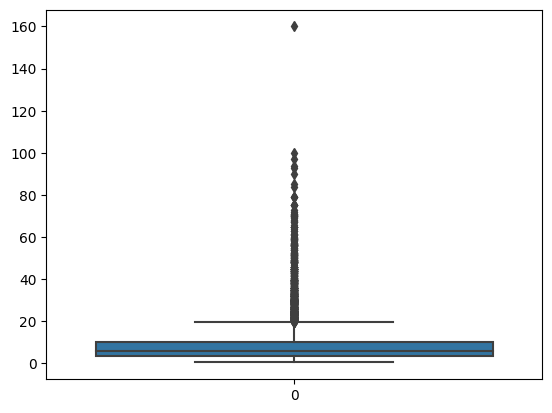

In [50]:
sns.boxplot(data=df["Price"])

In [52]:
df["Price"].sort_values(ascending=False)

3972    160.00
5775    100.00
1463     97.07
1926     93.67
1936     93.00
         ...  
3144      0.50
1584      0.45
3055      0.45
2768      0.45
1667      0.44
Name: Price, Length: 5822, dtype: float64

In [53]:
df.drop(3972, axis=0, inplace=True)

<Axes: >

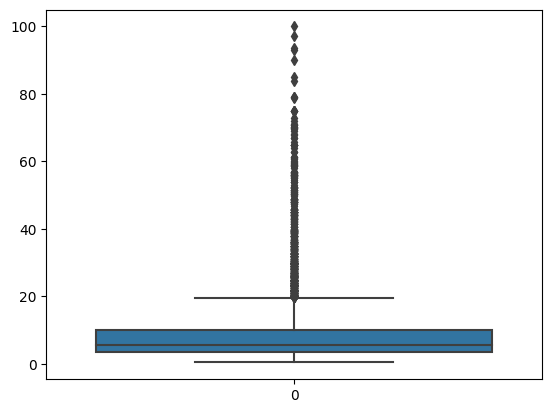

In [54]:
sns.boxplot(data=df["Price"])

In [55]:
df[df["Price"] > 20]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179,187.70,5,27.00,Land
19,Mercedes-Benz New C-Class C 220 CDI BE Avantgare,Bangalore,2014,78500,Diesel,Automatic,First,14.84,2143,167.62,5,28.00,Mercedes-Benz
22,Audi A6 2011-2015 35 TFSI Technology,Mumbai,2015,55985,Petrol,Automatic,First,13.53,1984,177.01,5,23.50,Audi
38,Mercedes-Benz M-Class ML 350 CDI,Pune,2013,85000,Diesel,Automatic,First,11.74,2987,254.80,5,28.00,Mercedes-Benz
50,Audi A4 2.0 TDI 177 Bhp Premium Plus,Kochi,2015,13648,Diesel,Automatic,First,17.11,1968,174.33,5,21.43,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800,BMW 5 Series 2013-2017 530d M Sport,Bangalore,2016,16000,Diesel,Automatic,First,14.69,2993,258.00,5,48.00,BMW
5804,Audi Q3 2.0 TDI,Bangalore,2014,65630,Diesel,Automatic,First,15.73,1968,174.33,5,21.75,Audi
5824,Mercedes-Benz GLA Class 200 Sport,Kochi,2018,17773,Petrol,Automatic,First,13.70,1991,183.00,5,26.76,Mercedes-Benz
5849,Jaguar XF 2.2 Litre Luxury,Kochi,2016,31150,Diesel,Automatic,First,16.36,2179,187.70,5,30.54,Jaguar


# Encoding

In [56]:
nominal=['Location','Fuel_Type', 'Transmission', 'Brand']
ordinal=['Owner_Type']

In [57]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [58]:
# Mapping 'Owner_Type'
owner = {
    'First'         : 4,
    'Second'        : 3,
    'Third'         : 2,
    'Fourth & Above': 1,
}
df['Owner_Type'] = df['Owner_Type'].map(owner)
df['Owner_Type'].unique()

array([4, 3, 1, 2], dtype=int64)

In [59]:
# mapping the rest
df = pd.get_dummies(df, columns=nominal, drop_first=True)

In [60]:
df.head(10)

,Name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_Bangalore,...,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,Maruti Wagon R LXI CNG,2010,72000,4,26.60,998,58.16,5,1.75,0,...,0,0,0,0,0,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,4,19.67,1582,126.20,5,12.50,0,...,0,0,0,0,0,0,0,0,0,0
2,Honda Jazz V,2011,46000,4,18.20,1199,88.70,5,4.50,0,...,0,0,0,0,0,0,0,0,0,0
3,Maruti Ertiga VDI,2012,87000,4,20.77,1248,88.76,7,6.00,0,...,0,0,0,0,0,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,3,15.20,1968,140.80,5,17.74,0,...,0,0,0,0,0,0,0,0,0,0
5,Hyundai EON LPG Era Plus Option,2012,75000,4,21.10,814,55.20,5,2.35,0,...,0,0,0,0,0,0,0,0,0,0
6,Nissan Micra Diesel XV,2013,86999,4,23.08,1461,63.10,5,3.50,0,...,0,0,1,0,0,0,0,0,0,0
7,Toyota Innova Crysta 2.8 GX AT 8S,2016,36000,4,11.36,2755,171.50,8,17.50,0,...,0,0,0,0,0,0,0,1,0,0
8,Volkswagen Vento Diesel Comfortline,2013,64430,4,20.54,1598,103.60,5,5.20,0,...,0,0,0,0,0,0,0,0,1,0
9,Tata Indica Vista Quadrajet LS,2012,65932,3,22.30,1248,74.00,5,1.95,0,...,0,0,0,0,0,0,1,0,0,0


In [61]:
df.columns

Index(['Name', 'Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine',
       'Power', 'Seats', 'Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Brand_Audi', 'Brand_BMW',
       'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat',
       'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_ISUZU', 'Brand_Isuzu', 'Brand_Jaguar', 'Brand_Jeep',
       'Brand_Land', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz',
       'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche',
       'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo'],
      dtype='object')

In [62]:
scaler = StandardScaler()
df[['Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats']] = scaler.fit_transform(df[['Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']])

In [63]:
df.head(10)

,Name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_Bangalore,...,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,Maruti Wagon R LXI CNG,-1.098385,0.455870,0.438138,2.000975,-1.048306,-1.028994,-0.357678,1.75,0,...,0,0,0,0,0,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,0.480852,-0.468748,0.438138,0.323532,-0.069518,0.244076,-0.357678,12.50,0,...,0,0,0,0,0,0,0,0,0,0
2,Honda Jazz V,-0.782537,-0.319616,0.438138,-0.032289,-0.711428,-0.457572,-0.357678,4.50,0,...,0,0,0,0,0,0,0,0,0,0
3,Maruti Ertiga VDI,-0.466690,0.903266,0.438138,0.589793,-0.629304,-0.456449,2.138774,6.00,0,...,0,0,0,0,0,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,-0.150843,-0.478590,-1.804961,-0.758454,0.577420,0.517251,-0.357678,17.74,0,...,0,0,0,0,0,0,0,0,0,0
5,Hyundai EON LPG Era Plus Option,-0.466690,0.545349,0.438138,0.669671,-1.356691,-1.084378,-0.357678,2.35,0,...,0,0,0,0,0,0,0,0,0,0
6,Nissan Micra Diesel XV,-0.150843,0.903236,0.438138,1.148940,-0.272315,-0.936564,-0.357678,3.50,0,...,0,0,1,0,0,0,0,0,0,0
7,Toyota Innova Crysta 2.8 GX AT 8S,0.796699,-0.617879,0.438138,-1.687946,1.896437,1.091668,3.387000,17.50,0,...,0,0,0,0,0,0,0,1,0,0
8,Volkswagen Vento Diesel Comfortline,-0.150843,0.230084,0.438138,0.534120,-0.042702,-0.178784,-0.357678,5.20,0,...,0,0,0,0,0,0,0,0,1,0
9,Tata Indica Vista Quadrajet LS,-0.466690,0.274884,-1.804961,0.960137,-0.629304,-0.732618,-0.357678,1.95,0,...,0,0,0,0,0,0,1,0,0,0


In [65]:
df.drop("Name", axis=1, inplace=True)

In [66]:
df.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Brand_Audi', 'Brand_BMW',
       'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat',
       'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_ISUZU', 'Brand_Isuzu', 'Brand_Jaguar', 'Brand_Jeep',
       'Brand_Land', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz',
       'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche',
       'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo'],
      dtype='object')

In [ ]:
df.to_csv("Data/used_cars_after_EDA.csv")